# RAMP on predicting cyclist traffic in Paris

## 1. Imports

## 1.1 Import Libraries

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [1]:
print("hello")

hello


In [2]:
%matplotlib inline
sns.set_theme()  # Apply the default theme of seaborn
plt.rcParams["figure.figsize"] = (10, 4)  # Set the figure size for all plots

In [3]:
%pip install -U ydata_profiling # -U is to accept by default the questions of the terminal
import ydata_profiling

## 1.2 Import Data

In [4]:
train_data = pd.read_parquet(Path("data") / "train.parquet")
test_data = pd.read_parquet(Path("data") / "final_test.parquet")
external_data = pd.read_csv("data/external_data.csv")

# 2. Data Exploration

### Train

In [5]:
train_data.columns

Index(['counter_id', 'counter_name', 'site_id', 'site_name', 'bike_count',
       'date', 'counter_installation_date', 'coordinates',
       'counter_technical_id', 'latitude', 'longitude', 'log_bike_count'],
      dtype='object')

In [42]:
train_data.tail(10)

counter_id                counter_name    site_id  \
929160  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
929163  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
929166  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
929169  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
929172  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
929175  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
929178  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
929181  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
929184  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   
929187  300014702-353245971  254 rue de Vaugirard SO-NE  300014702   

                   site_name  bike_count                date  \
929160  254 rue de Vaugirard       294.0 2021-09-08 07:00:00   
929163  254 rue de Vaugirard       128.0 2021-09-08 14:00:00   
929166  254 rue de Vaugirard       329.0 2021-09-08 16:00:00   
929169  254 rue de Vaugirard         4.0 2021-09-09 01:00:00   
929172  254 rue de Vaugirard        22.0 2021-09-09 04:00:00   
929175  254 rue de Vaugirard       445.0 2021-09-09 06:00:00   
929178  254 rue de Vaugirard       145.0 2021-09-09 10:00:00   
929181  254 rue de Vaugirard       218.0 2021-09-09 15:00:00   
929184  254 rue de Vaugirard        21.0 2021-09-09 22:00:00   
929187  254 rue de Vaugirard        15.0 2021-09-09 23:00:00   

       counter_installation_date       coordinates counter_technical_id  \
929160                2020-11-29  48.83977,2.30198          Y2H20114504   
929163                2020-11-29  48.83977,2.30198          Y2H20114504   
929166                2020-11-29  48.83977,2.30198          Y2H20114504   
929169                2020-11-29  48.83977,2.30198          Y2H20114504   
929172                2020-11-29  48.83977,2.30198          Y2H20114504   
929175                2020-11-29  48.83977,2.30198          Y2H20114504   
929178                2020-11-29  48.83977,2.30198          Y2H20114504   
929181                2020-11-29  48.83977,2.30198          Y2H20114504   
929184                2020-11-29  48.83977,2.30198          Y2H20114504   
929187                2020-11-29  48.83977,2.30198          Y2H20114504   

        latitude  longitude  log_bike_count  
929160  48.83977    2.30198        5.686975  
929163  48.83977    2.30198        4.859812  
929166  48.83977    2.30198        5.799093  
929169  48.83977    2.30198        1.609438  
929172  48.83977    2.30198        3.135494  
929175  48.83977    2.30198        6.100319  
929178  48.83977    2.30198        4.983607  
929181  48.83977    2.30198        5.389072  
929184  48.83977    2.30198        3.091042  
929187  48.83977    2.30198        2.772589

In [7]:
train_data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Test

In [8]:
test_data.head(30)

counter_id              counter_name    site_id  \
0   100007049-102007049  28 boulevard Diderot E-O  100007049   
1   100007049-102007049  28 boulevard Diderot E-O  100007049   
2   100007049-102007049  28 boulevard Diderot E-O  100007049   
3   100007049-102007049  28 boulevard Diderot E-O  100007049   
4   100007049-102007049  28 boulevard Diderot E-O  100007049   
5   100007049-102007049  28 boulevard Diderot E-O  100007049   
6   100007049-102007049  28 boulevard Diderot E-O  100007049   
7   100007049-102007049  28 boulevard Diderot E-O  100007049   
8   100007049-102007049  28 boulevard Diderot E-O  100007049   
9   100007049-102007049  28 boulevard Diderot E-O  100007049   
10  100007049-102007049  28 boulevard Diderot E-O  100007049   
11  100007049-102007049  28 boulevard Diderot E-O  100007049   
12  100007049-102007049  28 boulevard Diderot E-O  100007049   
13  100007049-102007049  28 boulevard Diderot E-O  100007049   
14  100007049-102007049  28 boulevard Diderot E-O  100007049   
15  100007049-102007049  28 boulevard Diderot E-O  100007049   
16  100007049-102007049  28 boulevard Diderot E-O  100007049   
17  100007049-102007049  28 boulevard Diderot E-O  100007049   
18  100007049-102007049  28 boulevard Diderot E-O  100007049   
19  100007049-102007049  28 boulevard Diderot E-O  100007049   
20  100007049-102007049  28 boulevard Diderot E-O  100007049   
21  100007049-102007049  28 boulevard Diderot E-O  100007049   
22  100007049-102007049  28 boulevard Diderot E-O  100007049   
23  100007049-102007049  28 boulevard Diderot E-O  100007049   
24  100007049-102007049  28 boulevard Diderot E-O  100007049   
25  100007049-102007049  28 boulevard Diderot E-O  100007049   
26  100007049-102007049  28 boulevard Diderot E-O  100007049   
27  100007049-102007049  28 boulevard Diderot E-O  100007049   
28  100007049-102007049  28 boulevard Diderot E-O  100007049   
29  100007049-102007049  28 boulevard Diderot E-O  100007049   

               site_name                date counter_installation_date  \
0   28 boulevard Diderot 2021-09-10 01:00:00                2013-01-18   
1   28 boulevard Diderot 2021-09-10 13:00:00                2013-01-18   
2   28 boulevard Diderot 2021-09-10 17:00:00                2013-01-18   
3   28 boulevard Diderot 2021-09-10 19:00:00                2013-01-18   
4   28 boulevard Diderot 2021-09-10 22:00:00                2013-01-18   
5   28 boulevard Diderot 2021-09-11 00:00:00                2013-01-18   
6   28 boulevard Diderot 2021-09-11 01:00:00                2013-01-18   
7   28 boulevard Diderot 2021-09-11 03:00:00                2013-01-18   
8   28 boulevard Diderot 2021-09-11 04:00:00                2013-01-18   
9   28 boulevard Diderot 2021-09-11 06:00:00                2013-01-18   
10  28 boulevard Diderot 2021-09-11 07:00:00                2013-01-18   
11  28 boulevard Diderot 2021-09-11 12:00:00                2013-01-18   
12  28 boulevard Diderot 2021-09-11 13:00:00                2013-01-18   
13  28 boulevard Diderot 2021-09-11 18:00:00                2013-01-18   
14  28 boulevard Diderot 2021-09-11 19:00:00                2013-01-18   
15  28 boulevard Diderot 2021-09-11 20:00:00                2013-01-18   
16  28 boulevard Diderot 2021-09-11 21:00:00                2013-01-18   
17  28 boulevard Diderot 2021-09-12 06:00:00                2013-01-18   
18  28 boulevard Diderot 2021-09-12 07:00:00                2013-01-18   
19  28 boulevard Diderot 2021-09-12 08:00:00                2013-01-18   
20  28 boulevard Diderot 2021-09-12 14:00:00                2013-01-18   
21  28 boulevard Diderot 2021-09-10 03:00:00                2013-01-18   
22  28 boulevard Diderot 2021-09-12 19:00:00                2013-01-18   
23  28 boulevard Diderot 2021-09-10 04:00:00                2013-01-18   
24  28 boulevard Diderot 2021-09-12 22:00:00                2013-01-18   
25  28 boulevard Diderot 2021-09-10 05:00:00                2013-01-18   
26  28 boulevard Diderot 2021-

In [9]:
test_data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Visualizing the data


Let's visualize the data, starting from the spatial distribution of counters on the map

In [10]:
import folium

m = folium.Map(
    location=train_data[["latitude", "longitude"]].mean(axis=0), zoom_start=13
)

for _, row in (
    train_data[["counter_technical_id", "latitude", "longitude"]]
    .drop_duplicates("counter_technical_id")
    .iterrows()
):
    folium.Marker(
        row[["latitude", "longitude"]].values.tolist(),
        popup=row["counter_technical_id"],
    ).add_to(m)

m

/opt/anaconda3/envs/bikes-count/lib/python3.10/site-packages/folium/utilities.py:86: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coords = (location[0], location[1])


## Numerical features
1. Histogram
2. Box plot to detect outliers

In [34]:
train_data.columns

Index(['counter_id', 'counter_name', 'site_id', 'site_name', 'bike_count',
       'date', 'counter_installation_date', 'coordinates',
       'counter_technical_id', 'latitude', 'longitude', 'log_bike_count'],
      dtype='object')

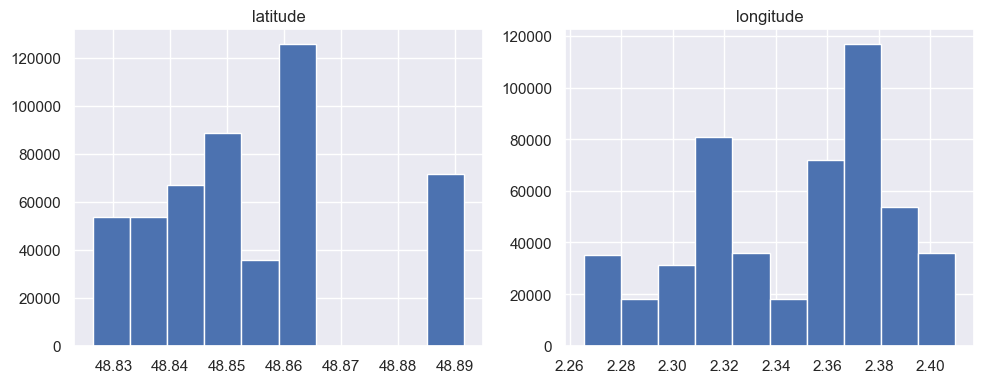

In [38]:
# Selecting the numerical columns with the np.number type
df_numerical = train_data.drop(columns=["log_bike_count", "site_id"]).select_dtypes(
    include=np.number
)
num_features = df_numerical.columns

train_data.drop(
    columns=[
        "site_id",
        "date",
        "counter_installation_date",
        "bike_count",
        "log_bike_count",
    ]
).hist()
plt.tight_layout()
plt.show();

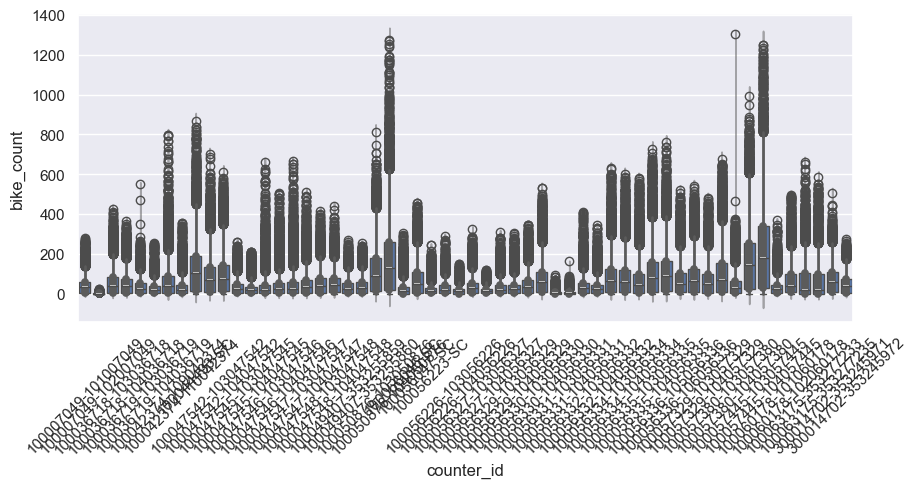

In [29]:
fig, axes = plt.subplots(2, np.ceil(len(num_features) / 2), figsize=(20, 11))
for ax, features in zip(axes.flatten(), num_features):
    sns.boxplot(x=df_numerical[features], ax=ax, color="yellowgreen")
plt.suptitle("Numeric Variables' Box Plots")
plt.show()

In [39]:
# Selecting the numerical columns with the np.number type
df_numerical = train_data.select_dtypes(include=np.number)
df_numerical.head()

site_id  bike_count   latitude  longitude  log_bike_count
48321  100007049         0.0  48.846028   2.375429        0.000000
48324  100007049         1.0  48.846028   2.375429        0.693147
48327  100007049         0.0  48.846028   2.375429        0.000000
48330  100007049         4.0  48.846028   2.375429        1.609438
48333  100007049         9.0  48.846028   2.375429        2.302585

In [40]:
def cor_heatmap(cor):
    """This function plots the correlation between variables"""
    plt.figure(figsize=(8, 6))
    sns.heatmap(data=cor, annot=True, cmap=plt.cm.Reds, fmt=".1", mask=np.triu(cor))
    plt.show()


cor_spearman = df_numerical.corr(method="spearman")
cor_spearman

site_id  bike_count  latitude  longitude  log_bike_count
site_id         1.000000    0.099501  0.100815  -0.363151        0.099501
bike_count      0.099501    1.000000  0.151003  -0.003238        1.000000
latitude        0.100815    0.151003  1.000000   0.064863        0.151003
longitude      -0.363151   -0.003238  0.064863   1.000000       -0.003238
log_bike_count  0.099501    1.000000  0.151003  -0.003238        1.000000

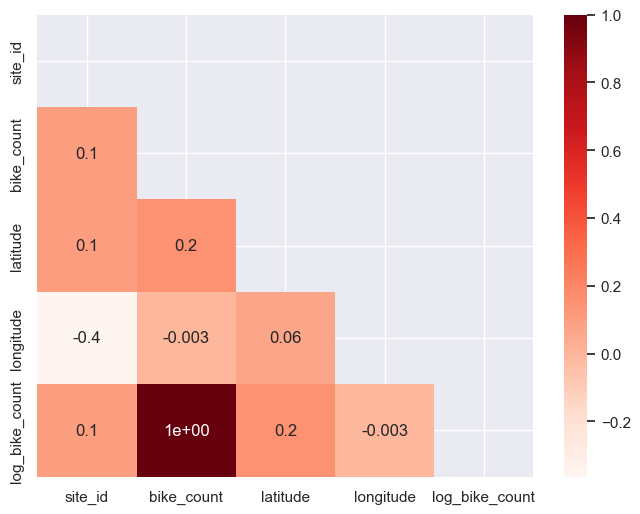

In [41]:
cor_heatmap(cor_spearman)

Group counts by:
1. Counter
2. Hour
3. Location

## Categorical features